In [25]:
# Pandas Library
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("sales_data_types.xlsx")
df
#Here the idex_col is optinal if u want to use any existing column as an index we can use this field
#df=pd.read_excel("data/Stocks.xlsx",index_col='Open')
#df=pd.read_excel("data/Stocks.xlsx",index_col='Date')
#df=pd.read_excel("data/Stocks.xlsx",index_col='High')

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,0.30,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",0.10,700,6,15,2014,Y
2,23477,ACMEIndustrial,"$50,000.00",$62500.00,0.25,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00",$490000.00,0.04,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00",$12750.00,-0.15,Closed,2,2,2014,N


###### Inspecting Data Frame

In [3]:
df.info() 
#(or)
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
Customer Number    5 non-null int64
Customer Name      5 non-null object
2016               5 non-null object
2017               5 non-null object
Percent Growth     5 non-null float64
Jan Units          5 non-null object
Month              5 non-null int64
Day                5 non-null int64
Year               5 non-null int64
Active             5 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 340.0+ bytes


In [ ]:
#https://pbpython.com/pandas_dtypes.html
#In order to convert data types in pandas, there are three basic options:
#Use astype() to force an appropriate dtype
#Create a custom function to convert the data
#Use pandas functions such as to_numeric() or to_datetime()

# Using the astype() function #

In [4]:
#dataframe['column_name'].astype('datatype')

df['Customer Number'].astype('int')



0     10002
1    552278
2     23477
3     24900
4    651029
Name: Customer Number, dtype: int32

In [5]:
#In order to actually change the customer number in the original dataframe, 
#make sure to assign it back since the astype() functions returns a copy.
df["Customer Number"] = df['Customer Number'].astype('int')
df.dtypes

Customer Number      int32
Customer Name       object
2016                object
2017                object
Percent Growth     float64
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

In [ ]:
'''
df['Jan Units'].astype('int') will throw an error.
The takeaway from this section is that astype() will only work if:

the data is clean and can be simply interpreted as a number
you want to convert a numeric value to a string object.

If the data has non-numeric characters or is not homogeneous, then astype() will not be a good choice for type conversion. 
You will need to do additional transforms for the type change to work correctly.
'''

###### Using Custom Function

In [6]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)




In [ ]:
'''
df['string_coulmn_name'].apply(convert_currency)
eg:
    df['2016'] = df['2016'].apply(convert_currency)
    df['2017'] = df['2017'].apply(convert_currency)
or 
df['2016'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
'''

In [7]:
def convert_percent(val):
    """
    Convert the percentage string to an actual floating point percent
    - Remove %
    - Divide by 100 to make decimal
    """
    new_val = val.replace('%', '')
    return float(new_val) / 100


If you are just learning python/pandas or if someone new to python is going to be maintaining code, I think the longer function is more readable. The primary reason is that it includes comments and can be broken down into a couple of steps. lambda functions are a little more difficult for the new user to grasp.
Secondly, if you are going to be using this function on multiple columns, I prefer not to duplicate the long lambda function.
Finally, using a function makes it easy to clean up the data when using read_csv(). I will cover usage at the end of the article.

###### Using np.where()

In [8]:
#df["Column_Name"] = np.where(df["Column_Name"] == "Y", True, False)

df["Active"] = np.where(df["Active"] == "Y", True, False)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,0.30,500,1,10,2015,True
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",0.10,700,6,15,2014,True
2,23477,ACMEIndustrial,"$50,000.00",$62500.00,0.25,125,3,29,2016,True
3,24900,Brekke LTD,"$350,000.00",$490000.00,0.04,75,10,27,2015,True
4,651029,Harbor Co,"$15,000.00",$12750.00,-0.15,Closed,2,2,2014,False


Helper Functions

In [10]:
print (pd.to_numeric(df['Jan Units'], errors='coerce'))

'''
There are a couple of items of note. First, the function easily processes the data and creates a float64 column. 
Additionally, it replaces the invalid “Closed” value with a NaN value because we passed errors=coerce . 
We can leave that value there or fill it in with a 0 using fillna(0)
'''
pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)

#df["Jan Units"] = pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)

0    500.0
1    700.0
2    125.0
3     75.0
4      NaN
Name: Jan Units, dtype: float64


'\nThere are a couple of items of note. First, the function easily processes the data and creates a float64 column. \nAdditionally, it replaces the invalid “Closed” value with a NaN value because we passed errors=coerce . \nWe can leave that value there or fill it in with a 0 using fillna(0)\n'

In [12]:
print (pd.to_datetime(df[['Month', 'Day', 'Year']]))
'''
In this case, the function combines the columns into a new series of the appropriate datateime64 dtype.
df["Start_Date"] = pd.to_datetime(df[['Month', 'Day', 'Year']])

'''

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]


'\nIn this case, the function combines the columns into a new series of the appropriate datateime64 dtype.\ndf["Start_Date"] = pd.to_datetime(df[[\'Month\', \'Day\', \'Year\']])\n\n'

In [18]:
df['Jan Units']
df['Jan Units'].describe()
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,0.30,500,1,10,2015,True
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",0.10,700,6,15,2014,True
2,23477,ACMEIndustrial,"$50,000.00",$62500.00,0.25,125,3,29,2016,True
3,24900,Brekke LTD,"$350,000.00",$490000.00,0.04,75,10,27,2015,True
4,651029,Harbor Co,"$15,000.00",$12750.00,-0.15,Closed,2,2,2014,False


In [20]:
df_2 = pd.read_excel("sales_data_types.xlsx",
                   dtype={'Customer Number': 'int'},
                   converters={'2016': convert_currency,
                               '2017': convert_currency,
                               #'Percent Growth': convert_percent,
                               'Jan Units': lambda x: pd.to_numeric(x, errors='coerce'),
                               'Active': lambda x: np.where(x == "Y", True, False)
                              })

df_2

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",0.10,700.0,6,15,2014,True
2,23477,ACMEIndustrial,"$50,000.00",$62500.00,0.25,125.0,3,29,2016,True
3,24900,Brekke LTD,"$350,000.00",$490000.00,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,"$15,000.00",$12750.00,-0.15,NaN,2,2,2014,False


In [21]:
df_2.dtypes

Customer Number      int32
Customer Name       object
2016                object
2017                object
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active                bool
dtype: object

It is important to note that you can only apply a dtype or a converter function to a specified column once using this approach. If you try to apply both to the same column, then the dtype will be skipped.

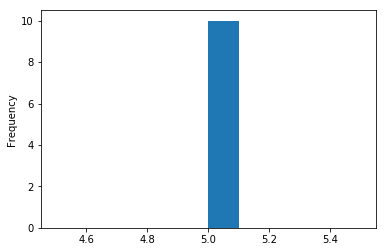

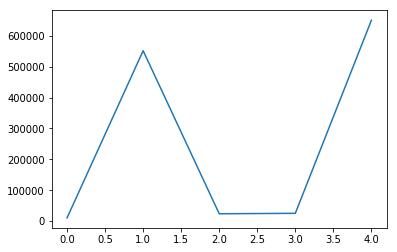

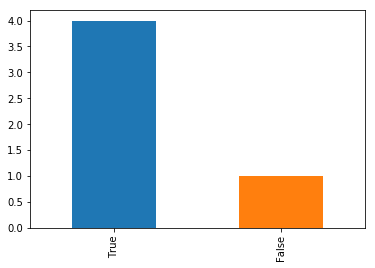

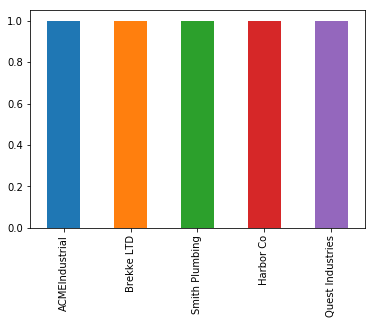

In [33]:
df.count().plot(kind='hist')
plt.show()
df['Customer Number'].plot()
plt.show()
df['Active'].value_counts().plot(kind='bar')
plt.show()
df['Customer Name'].value_counts().plot(kind='bar')
plt.show()

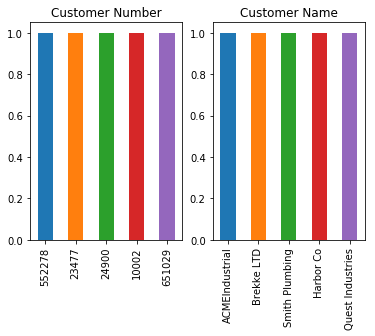

In [35]:
categorical_features = df.columns[0:2]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

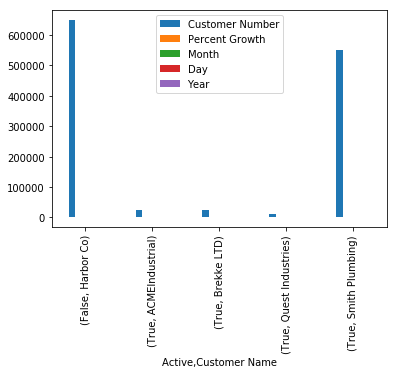

In [36]:
df.groupby(['Active','Customer Name']).sum().plot(kind='bar')

From a list of dicts
Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data:

In [37]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e., "not a number") values:

In [38]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#####From a dictionary of Series objects
As we saw before, a DataFrame can be constructed from a dictionary of Series objects as well:

In [45]:
population=pd.Series([1,2])
area=pd.Series({0:4,1:3})
pd.DataFrame({'population': population,
              'area': area})

,population,area
0,1,4
1,2,3


In [47]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.332866,0.888926
b,0.046595,0.869666
c,0.687722,0.175932


In [46]:
np.random.rand(3, 2)

array([[0.94248756, 0.77787756],
       [0.07218141, 0.51497821],
       [0.08971054, 0.80016017]])

###### Index objects also have many of the attributes familiar from NumPy arrays:

In [ ]:
# Pandas index is immutable we cant change it in run time.
print(ind.size, ind.shape, ind.ndim, ind.dtype)

###### Index as ordered set
Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic. The Index object follows many of the conventions used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
indA & indB  # intersection

In [ ]:
indA | indB  # union

In [ ]:
indA ^ indB  # symmetric difference

###### Indexers: loc and iloc
These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.

In [51]:
data = pd.Series(['a', 'b', 'c','h'], index=[1, 3, 5,'g'])
data

1    a
3    b
5    c
g    h
dtype: object

In [54]:
# explicit index when indexing
data[1]
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series.

First, the loc attribute allows indexing and slicing that always references the explicit index:

In [58]:
data.loc[['g',1]]

g    h
1    a
dtype: object

In [50]:
data.loc[1:3]
print(df2.loc[:,['A','B']])
print('-------- Returns every 3rd rows with columns A and B -----------------\n')
print(df2.loc[::3,['A','B']])
print ('--------- Returns upto the 2nd row with all the columns ----------------\n')
print(df2.loc[:2,:])

1    a
3    b
dtype: object

The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]
data.iloc[0:2]


In [ ]:
print (df2.iloc[3])

'''
By integer slices, acting similar to numpy/python:
'''
print ( df2.iloc[3:5,0:2])

'''
By lists of integer position locations, similar to the numpy/python style:
'''
print (df2.iloc[[1,2],[0,2]])

'''
For slicing rows explicitly:
'''
print (df2.iloc[1:3,:])
'''
For slicing columns explicitly:
'''
print (df2.iloc[:,1:3])
'''
For getting a particular value explicitly from the data frame
'''
print (df2.iloc[1,4])


In [ ]:
print ('############  Boolean Indexing    ################## \n')
'''Using a single column’s values to select data. '''
print ('Using a single column’s values to select data.  df2[df2.A > 0]  \n')
print(df2[df2.A > 0])
print ('\n')

In [ ]:
'''
Selecting values from a DataFrame where a boolean condition is met.
'''
print ('---Selecting values from a DataFrame where a boolean condition is met.  df2[df2 > 0] ---------\n')

print (df2[df2 > 0])

df2.loc[4] = [2, '2018-07-01',3,4,'Balaji','Masilamani']
df2.loc[5] = [3, '2018-07-01',4,5,'Balaji1','Masilamani1']

In [ ]:
'''
Using the isin() method for filtering:
'''
df2['G'] = ['one', 'one',np.nan,'three','four','three'] # inserting new column into data frame
print (df2)

df2.iloc[0,3]=np.nan    # Upadting specified position in the data frame based on the element location
df2.iloc[0,4]=np.nan

#df2.replace(True)

print (df2)
'''using isin () method '''
print (df2[df2['G'].isin(['two','four'])])
print (df2[df2['F'].isin(['Balaji','Masilamani'])])



In [ ]:
print (df2[df2['A']>0])
print (df2.count())
print (df2['A']+5)
#df2[df2['A']>0] = df2['A']+5
df2['A']=df2['A']+5
print (df2)

In [59]:
""" Missing Data  """
print ('-------------Missing Data----------------\n')
'''
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.
'''
'''
Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
'''
#df1 = df2.reindex(index=[1,2], columns=list(df2.columns) + ['E'])
#print (df1)
'''
To drop any rows that have missing data.
'''
df2.dropna(how='any')
print (df2)
df2.fillna(value=5,inplace=True)
print (df2)


-------------Missing Data----------------



NameError: name 'df2' is not defined

###### Zip Lists to build a DataFrame

In [60]:
list_keys=['Country', 'Total']
list_values=[['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

data=dict(zip(list_keys,list_values))
print(data)
df=pd.DataFrame(data)
df

{'Country': ['United States', 'Soviet Union', 'United Kingdom'], 'Total': [1118, 473, 273]}


,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


In [ ]:
#Labeling your data
# Build a list of labels: list_labels
list_labels = ['Country','Total Pop']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df

###### Building DataFrames using broadcasting

In [ ]:
cities=['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
df

###### Building Data frame from CSV

In [61]:
filepath='data/SN_d_tot_V2.0.csv'
col_names=['year','month','day','sunspots','definite']
sunspots=pd.read_csv(filepath,delimiter=";",header=None,usecols=[0,1,2,4,7],names=col_names,
                     na_values={'sunspots':['  -1']},parse_dates=[[0,1,2]],index_col='year_month_day')
sunspots.head()

FileNotFoundError: File b'data/SN_d_tot_V2.0.csv' does not exist

#######Operating on Null Values

###### Detecting null values
Pandas data structures have two useful methods for detecting null data: isnull() and notnull(). Either one will return a Boolean mask over the data. For example:

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data
data.isnull()
data[data.notnull()]

###### Dropping null values
In addition to the masking used before, there are the convenience methods, dropna() (which removes NA values) and fillna() (which fills in NA values). For a Series, the result is straightforward:

In [ ]:
data.dropna()

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

In [ ]:
df.dropna(axis=1)

In [ ]:
df[3] = np.nan
df

In [ ]:
df.dropna(axis='columns', how='all', inplace=True)
df

In [ ]:
df.dropna(axis='rows', thresh=3)

###### Filling null values
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the isnull() method as a mask, but because it is such a common operation Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

Consider the following Series:

In [62]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
data.fillna(0)

In [63]:
# forward-fill
data.fillna(method='ffill')
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [64]:
df.fillna(method='ffill', axis=1)

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273
